original blue points

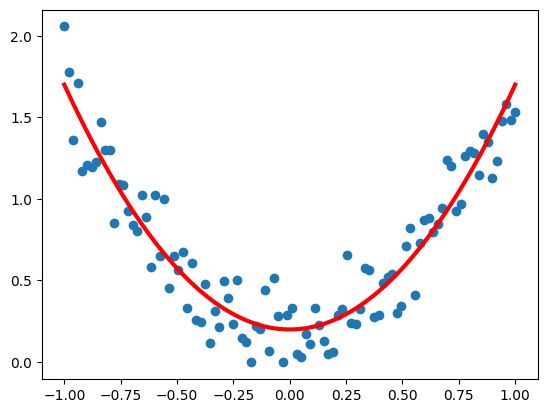

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-1, 1, 100)
y = 1.5*x*x + 0.2 + + 0.2*np.random.randn(100)
plt.scatter(x, y)
plt.plot(x, 1.5*x*x + 0.2, 'r-', lw=3)
plt.show()

numpy gradient descent to calculate the parameters

Iteration 0, Cost: 0.5065726433600636
Iteration 100, Cost: 0.038070689967050306
Iteration 200, Cost: 0.03273814876873171
Iteration 300, Cost: 0.0325439837115145
Iteration 400, Cost: 0.0325369138984475
Iteration 500, Cost: 0.032536656476965395
Iteration 600, Cost: 0.0325366471039001
Iteration 700, Cost: 0.03253664676261408
Iteration 800, Cost: 0.0325366467501874
Iteration 900, Cost: 0.03253664674973492


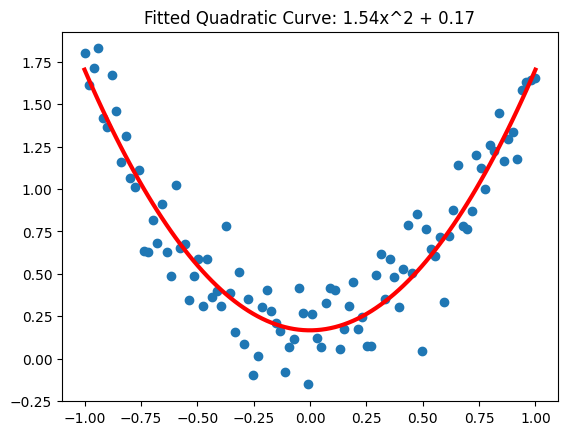

In [2]:
# Function to calculate the quadratic curve
def quadratic_curve(params, x):
    return params[0] * x**2 + params[1]

def cost_function(params, x, y):
    predictions = quadratic_curve(params, x)
    return np.mean((predictions - y)**2)

def cost_gradient(params, x, y):
    predictions = quadratic_curve(params, x)
    gradient = np.zeros_like(params)
    gradient[0] = 2 * np.mean((predictions - y) * x**2)
    gradient[1] = 2 * np.mean(predictions - y)
    return gradient

def gradient_descent(x, y, learning_rate=0.1, num_iterations=1000):
    params = np.zeros(2)  # Initial guess for parameters
    for i in range(num_iterations):
        gradient = cost_gradient(params, x, y)
        params -= learning_rate * gradient
        if i % 100 == 0:
            cost = cost_function(params, x, y)
            print(f"Iteration {i}, Cost: {cost}")
    return params

params = gradient_descent(x, y)
plt.scatter(x, y)
plt.plot(x, quadratic_curve(params, x), 'r-', lw=3)
plt.title(f"Fitted Quadratic Curve: {params[0]:.2f}x^2 + {params[1]:.2f}")
plt.show()

pytorch to learn the parameters

Epoch 0/1000, Loss: 0.7261085510253906
Epoch 100/1000, Loss: 0.038257092237472534
Epoch 200/1000, Loss: 0.032744940370321274
Epoch 300/1000, Loss: 0.03254422917962074
Epoch 400/1000, Loss: 0.03253692016005516
Epoch 500/1000, Loss: 0.03253665566444397
Epoch 600/1000, Loss: 0.032536644488573074
Epoch 700/1000, Loss: 0.032536644488573074
Epoch 800/1000, Loss: 0.032536644488573074
Epoch 900/1000, Loss: 0.032536644488573074


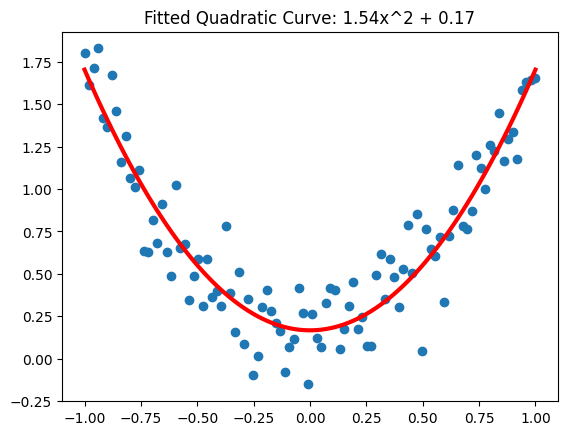

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

class QuadraticModel(nn.Module):
    def __init__(self):
        super(QuadraticModel, self).__init__()
        self.params = nn.Parameter(torch.zeros(2, 1))  # Parameters for ax^2 + b

    def forward(self, x):
        return self.params[0] * x**2 + self.params[1]

model = QuadraticModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

num_epochs = 1000
for epoch in range(num_epochs):
    predictions = model(x_tensor)
    loss = criterion(predictions, y_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{num_epochs}, Loss: {loss.item()}')
        
fitted_params = model.params.detach().numpy()
plt.scatter(x, y)
plt.plot(x, fitted_params[0] * x**2 + fitted_params[1], 'r-', lw=3)
plt.title(f"Fitted Quadratic Curve: {fitted_params[0][0]:.2f}x^2 + {fitted_params[1][0]:.2f}")
plt.show()